# Bank Marketing Campaign
## Ojetivo
Crear un modelo predictivo de la efectividad que tendrá una próxima posible campaña telefónica apoyándonos en los datos históricos del banco.
## Contexto comercial
Trabajaremos sobre campañas telefónicas de afiliación a los servicios de un banco portugues. Teniendo en cuenta lo costosas que son para el banco las campañas de marketing, necesita saber el comportamiento de sus clientes para con sus campañas y detectar de esa forma cuales son más eficientes y porque. Nos resulta importante entender al público que nos conviene apuntar con estas campañas por lo que prestaremos máxima atención al tipo de trabajo y el nivel educativo de los alcanzados por las campañas históricas que nos proporciona el banco en el dataset.
## Público del análisis: Estratégico
## Problema comercial
¿Cuales fueron las campañas más exitosas?, ¿las que tuvieron mejores resultados?

¿Que ocupaciones tendrán las personas que más contratan los servicios del banco?

¿Son las campañas telefónicas más efectivas entre las personas con estudios alcanzados más elevados?

¿Influye la situación económica del target y su entorno? (euribor e índice de precios al consumidor)

## Data Acquisition
Trabajaremos son datos históricos proporcionados por el banco sobre las 11 campañas telefónicas realizadas hasta la fecha, los mismos son entregados en formato CSV que importaremos con la libreria pandas, en ellos encontraremos 3 'key values' la aceptación o no de la campaña, el nivel educacional y el tipo de trabajo que realiza la persona de cada registro.

In [1]:
import pandas as pd
import numpy as np
bank_df = pd.read_csv('archivos/bank-additional.csv',sep=';') # importamos pandas numpy y el csv que en este caso está separado por ;

## Exploratory Data Analysis (EDA)

In [2]:
bank_df.head() # muestreamos los datos para ver que tipo de información nos brindan.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank_df.shape # verificamos la cantidad de registros (rows) y columnas (features)

(4119, 21)

In [4]:
bank_df[bank_df['y']=='yes'].count(axis=0, numeric_only=False) # filtro de los casos que la campaña consiguió un Yes, o sea una campaña exitosa

age               451
job               451
marital           451
education         451
default           451
housing           451
loan              451
contact           451
month             451
day_of_week       451
duration          451
campaign          451
pdays             451
previous          451
poutcome          451
emp.var.rate      451
cons.price.idx    451
cons.conf.idx     451
euribor3m         451
nr.employed       451
y                 451
dtype: int64

In [5]:
bank_df_suby = bank_df[bank_df['y']=='yes'] # genero un nuevo df filtrado solo con los registros de campañas exitosas

In [6]:
bank_df_suby.sort_values(by = 'campaign') # Ordeno el DF por campañas para un rápido vistazo la cantidad min y max 
# necesaria para una suscripción exitosa.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
19,50,blue-collar,married,basic.4y,no,no,yes,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,yes
2211,48,blue-collar,married,basic.9y,no,yes,no,cellular,may,tue,...,1,3,3,success,-1.8,93.876,-40.0,0.668,5008.7,yes
2182,43,technician,married,university.degree,unknown,unknown,unknown,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,yes
2169,21,student,single,high.school,no,no,no,cellular,oct,tue,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.982,4963.6,yes
2162,36,admin.,single,high.school,no,yes,no,cellular,aug,fri,...,1,3,2,success,-2.9,92.201,-31.4,0.849,5076.2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,48,technician,married,professional.course,no,yes,no,cellular,aug,fri,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
2087,30,admin.,single,university.degree,no,yes,no,cellular,jul,thu,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
1188,59,unemployed,married,basic.4y,unknown,yes,no,cellular,jul,thu,...,9,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
3448,43,admin.,married,high.school,no,no,no,telephone,jun,fri,...,10,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes


#### Vamos a dropear las columnas que no usaremos en el proyecto para simplificar y agilizar el analisis y la operatoria

In [44]:
columns_keep = ['age', 'job', 'education', 'month', 'campaign', 'previous', 'poutcome', 'y', 'euribor3m', 'cons.price.idx', 'cons.conf.idx']

In [45]:
bank_df_2 = bank_df[columns_keep]

In [10]:
bank_df_2

,age,job,education,month,campaign,previous,poutcome,y,euribor3m,cons.price.idx
0,30,blue-collar,basic.9y,may,2,0,nonexistent,no,1.313,92.893
1,39,services,high.school,may,4,0,nonexistent,no,4.855,93.994
2,25,services,high.school,jun,1,0,nonexistent,no,4.962,94.465
3,38,services,basic.9y,jun,3,0,nonexistent,no,4.959,94.465
4,47,admin.,university.degree,nov,1,0,nonexistent,no,4.191,93.200
...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,basic.6y,jul,1,0,nonexistent,no,4.958,93.918
4115,39,admin.,high.school,jul,1,0,nonexistent,no,4.959,93.918
4116,27,student,high.school,may,2,1,failure,no,1.354,92.893
4117,58,admin.,high.school,aug,1,0,nonexistent,no,4.966,93.444


In [64]:
#bank_df_2.info()

In [11]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('dark_background') # usar este style si usas el theme oscuro del jupyter notebook

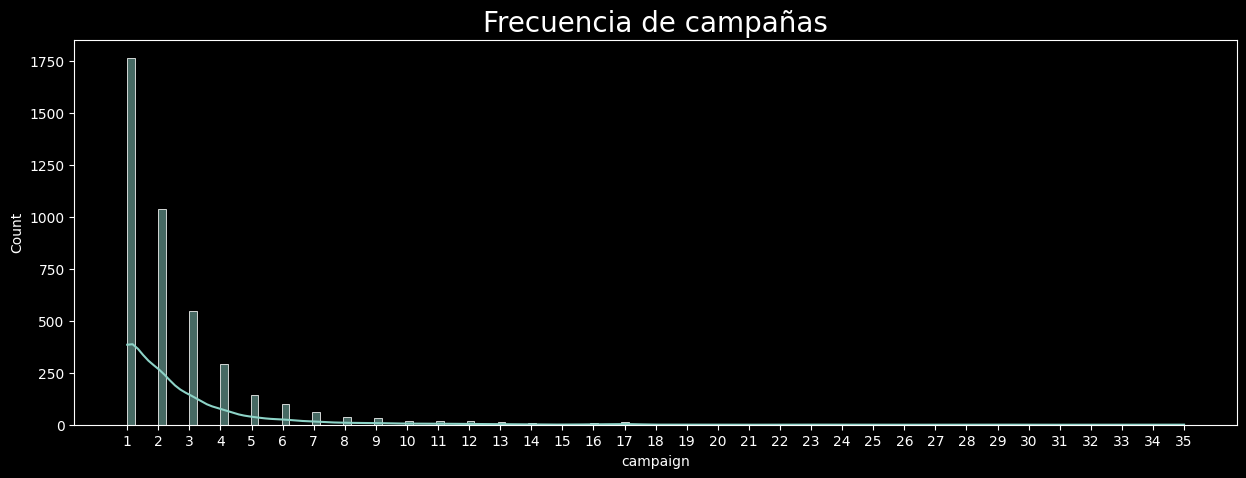

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,5)) # creamos el lienzo

sns.histplot(data=bank_df_2['campaign'], kde=True)
ax.set_title('Frecuencia de campañas', fontsize=20)
plt.xticks(range(1,36,+1));

In [13]:
bank_df_2[bank_df_2['campaign'] > 11].sort_values(by='campaign') # filtro y ordeno las campañas por su valor nominal para compara y entender la curva anterior

,age,job,education,month,campaign,previous,poutcome,y,euribor3m,cons.price.idx
3319,49,technician,professional.course,jul,12,0,nonexistent,no,4.968,93.918
1216,45,services,high.school,may,12,0,nonexistent,no,4.857,93.994
3433,30,management,high.school,aug,12,0,nonexistent,no,4.963,93.444
2108,32,services,high.school,may,12,0,nonexistent,no,1.266,92.893
836,31,blue-collar,basic.6y,jun,12,0,nonexistent,no,4.959,94.465
...,...,...,...,...,...,...,...,...,...,...
2485,41,technician,high.school,jun,24,0,nonexistent,no,4.959,94.465
56,29,admin.,university.degree,jun,27,0,nonexistent,no,4.959,94.465
3564,25,admin.,basic.9y,jul,29,0,nonexistent,no,4.968,93.918
3241,39,services,high.school,jul,29,0,nonexistent,no,4.968,93.918


####  ¿Cuales fueron las campañas más exitosas?, ¿las que tuvieron mejores resultados?

In [63]:
# agrupamos los datos por campaña y contamos la cantidad de 'yes' en la columna 'y'
camp_yes = bank_df_2[bank_df_2['y'] == 'yes'].groupby('campaign')['y'].count()

In [15]:
# creamos las variables para los ejes del gráfico, utilizaremos un barplot, para comparar
x = camp_yes.index
y = camp_yes.values

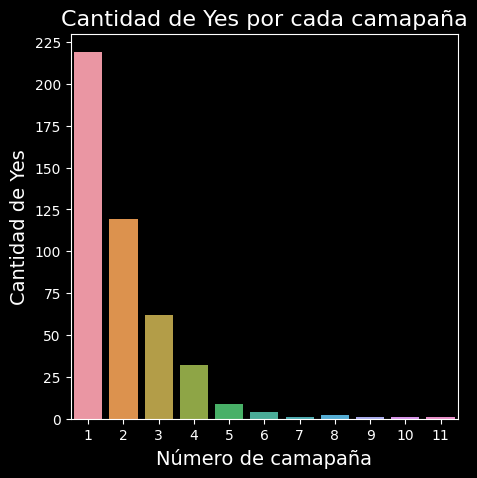

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=x, y=y)
ax.set_ylabel('Cantidad de Yes', fontsize=(14))
ax.set_xlabel('Número de camapaña', fontsize=(14))
ax.set_title('Cantidad de Yes por cada camapaña', fontsize=(16))
plt.yticks(range(0,max(y)+25, +25)); # seteamos el rnago de ticks y su crecimiento

In [62]:
# cuento cuantas campañas hay en el dataset de cada una
campaign_counts = bank_df['campaign'].value_counts()

In [61]:
# ahora me interesaría ver cual es la proporción de 'yes' para cada grupo de camapañas, asi podemos estimar su éxito
proporcion = bank_df_2.groupby('campaign')['y'].apply(lambda x: (x == 'yes').mean())

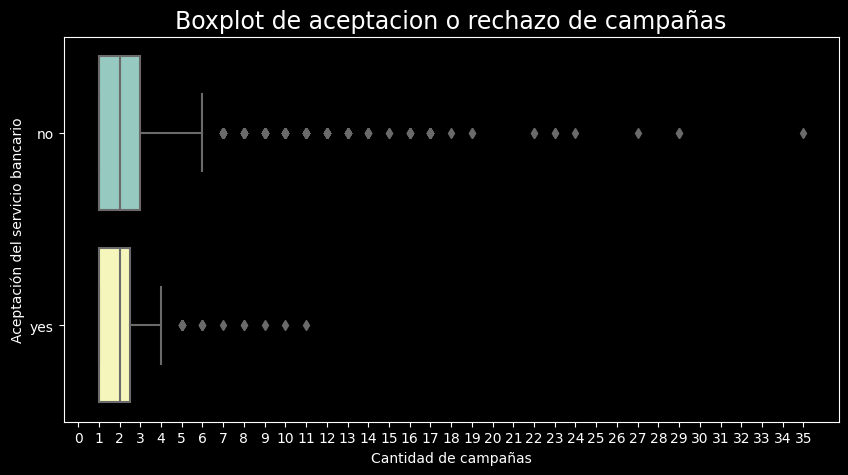

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) # inicio con el lienzo
sns.boxplot(data= bank_df_2, x='campaign', y='y') # de donde obtiene los datos
plt.xticks(range(0, max(bank_df['campaign'])+1, +1)) # con esta linea le cambiamos los ticks del eje X para darle más visibilidad y que no se amontonen
ax.set_title('Boxplot de aceptacion o rechazo de campañas', fontsize=17) # titulos..
ax.set_xlabel('Cantidad de campañas') # labels, nada que explicar
ax.set_ylabel('Aceptación del servicio bancario');

#### ¿Que ocupaciones tendrán las personas que más contratan los servicios del banco?

In [59]:
proporcion_job = bank_df_2.groupby('job')['y'].apply(lambda x: (x == 'yes').mean())

In [60]:
bar_labels = bank_df_2['job'].values
bar_labels = np.unique(bar_labels)

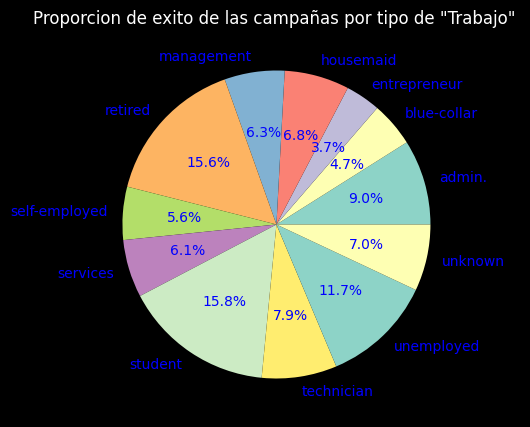

In [22]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pie(proporcion_job, labels=bar_labels, autopct="%1.1f%%") #agregamos esta linea para ponerle los %% dentro del gráfico, por defecto quedan por fuera.
ax.set_title('Proporcion de exito de las campañas por tipo de "Trabajo" ')
for text in ax.texts:
  text.set_color('blue'); # cambié el color

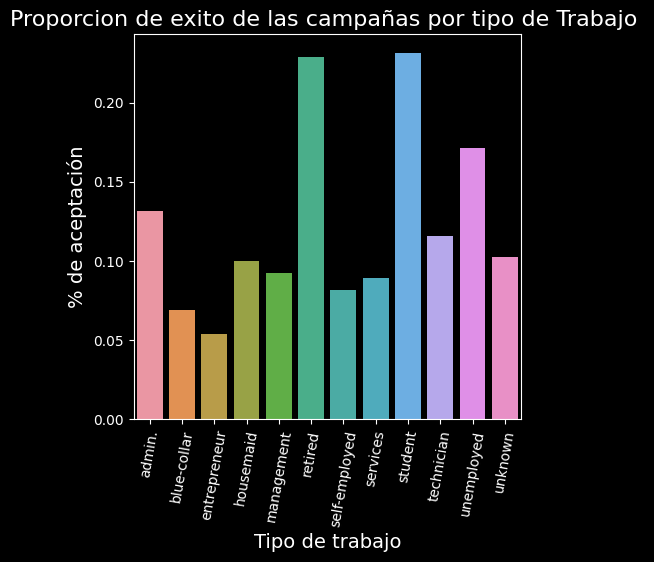

In [23]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=bar_labels, y=proporcion_job)
ax.set_ylabel('% de aceptación', fontsize=(14))
ax.set_xlabel('Tipo de trabajo', fontsize=(14))
ax.set_title('Proporcion de exito de las campañas por tipo de Trabajo ', fontsize=(16))
ax.tick_params(axis='x', rotation=80); # giramos el texto de los labels del eje x para su correcta lectura

#### ¿Son las campañas telefónicas más efectivas entre las personas con estudios alcanzados más elevados?

In [65]:
proporcion_education = bank_df_2.groupby('education')['y'].apply(lambda x: (x == 'yes').mean())

In [66]:
bar_labels_education = bank_df_2['education'].values
bar_labels_education = np.unique(bar_labels_education)

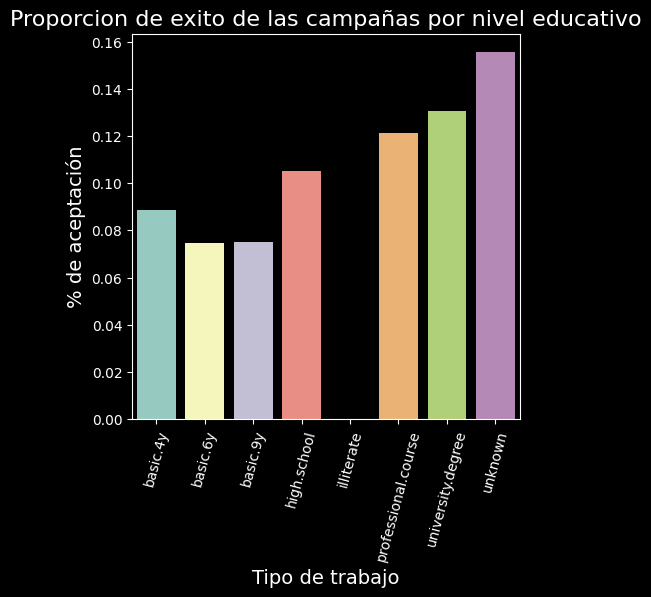

In [58]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.barplot(x=bar_labels_education, y=proporcion_education)
ax.set_ylabel('% de aceptación', fontsize=(14))
ax.set_xlabel('Tipo de trabajo', fontsize=(14))
ax.set_title('Proporcion de exito de las campañas por nivel educativo', fontsize=(16))
ax.tick_params(axis='x', rotation=75); # giramos el texto de los labels del eje x para su correcta lectura

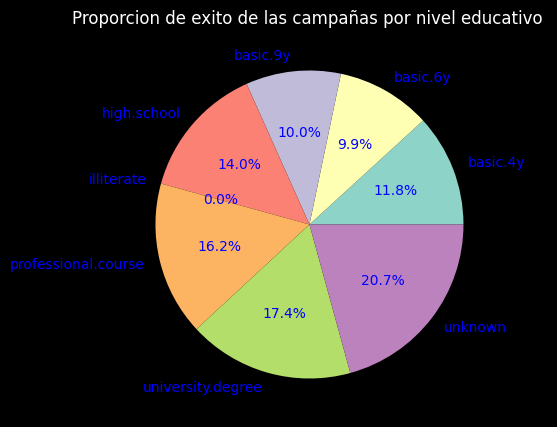

In [27]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pie(proporcion_education, labels=bar_labels_education, autopct="%1.1f%%") #agregamos esta linea para ponerle los %% dentro del gráfico, por defecto quedan por fuera.
ax.set_title('Proporcion de exito de las campañas por nivel educativo ')
for text in ax.texts:
  text.set_color('blue'); # cambié el color

### Vamos a graficar como se distribuyen nuestars variables para entender mejor el conjunto de los datos

#### Separamos las variables categóricas de las numéricas

In [67]:
#bank_df_2.dtypes

In [47]:
types = bank_df_2.dtypes

In [68]:
num_var = types[(types == 'int64') | (types == 'float64')].index

In [69]:
cat_var = types[types == object ].index

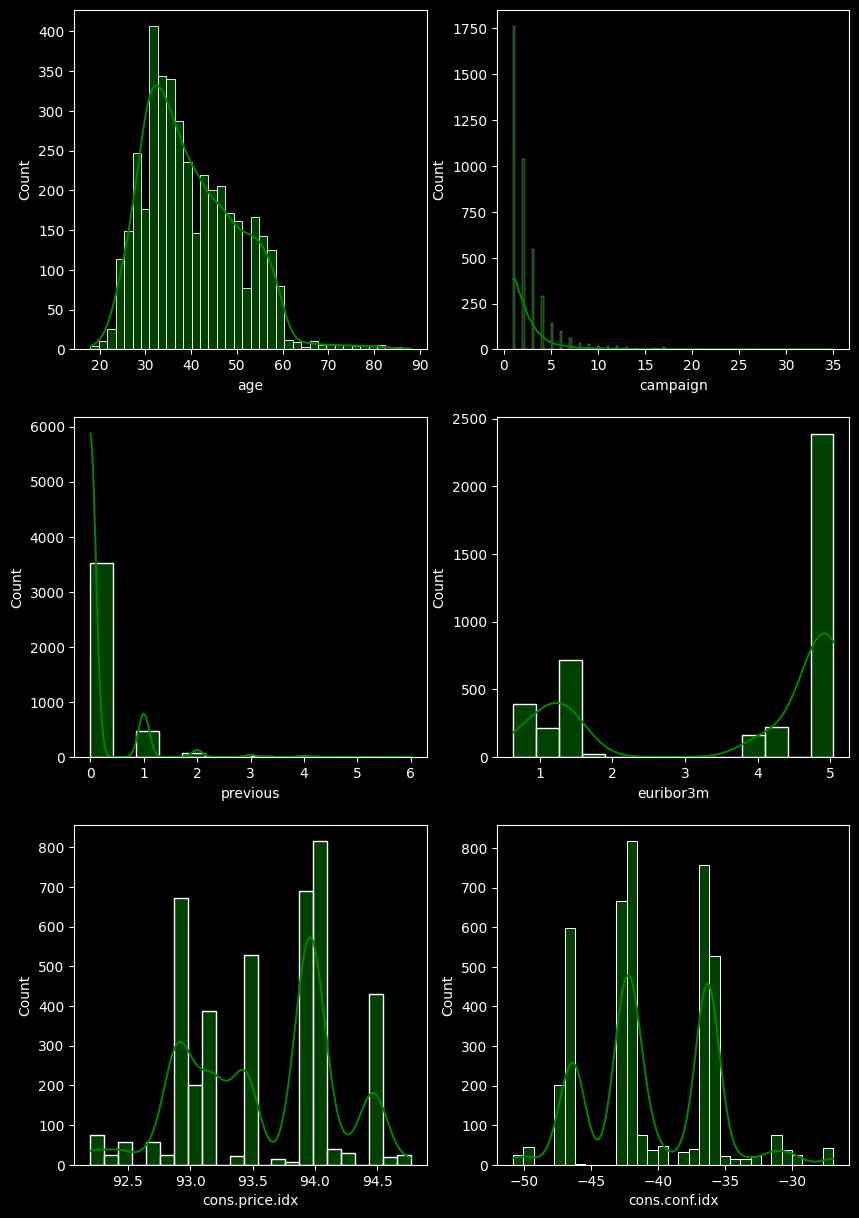

In [50]:
n_cols = 2 # número de columnas
n_rows = len(num_var) // n_cols # número de filas

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5*n_rows))

for i, var in enumerate(num_var):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data=bank_df_2, x=var, color='g', kde=True, ax=axes[row][col])

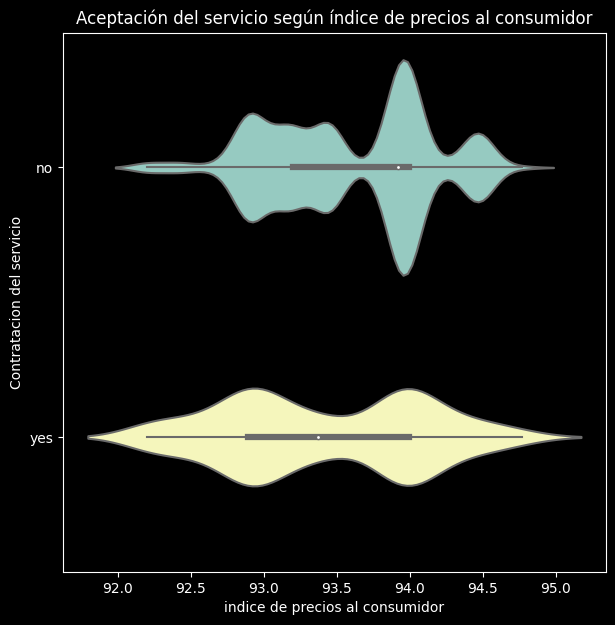

In [53]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.violinplot(x='cons.price.idx', y='y', data=bank_df_2, orient='h')
ax.set_xlabel('indice de precios al consumidor')
ax.set_ylabel('Contratacion del servicio')
plt.title('Aceptación del servicio según índice de precios al consumidor');

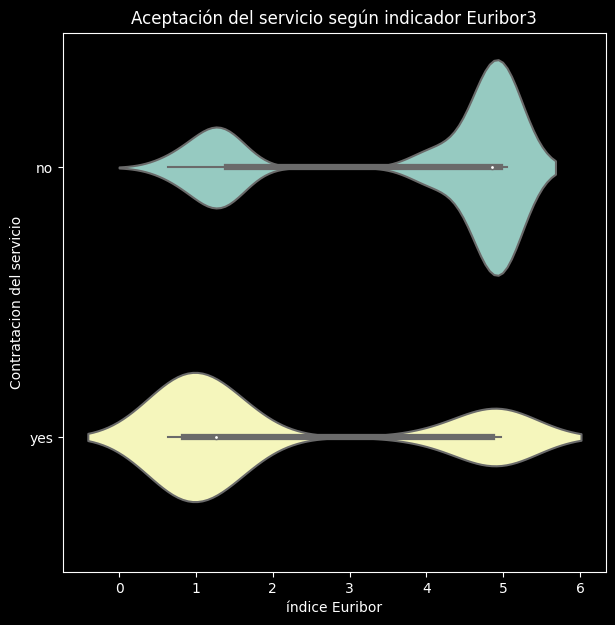

In [57]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.violinplot(x='euribor3m', y='y', data=bank_df_2, orient='h')
ax.set_xlabel('índice Euribor')
ax.set_ylabel('Contratacion del servicio')
plt.title('Aceptación del servicio según indicador Euribor3');

## Con clusiones del EDA
Con los analisis estadísticos realizados podemos concluir que:
A pesar de repetir campañas, los clientes que eligen no contratar los servicios, es dificil que se los pueda convencer con insistencia al largo plazo, hay un exito notable en las primeras 4 campañas, pero a partir de la 4ta campaña el exito disminuye muchísimo

también observamos que las ocupaciones de los alcanzados por las camapañas que más concretan la suscripción al servicio bancario son los estudiantes, seguimos muy de cerca por retirados, luego desempleados con un buen margen y pegadito a ellos en 4to lugar los administrativos.

Por otro lado, el nivel educativo parece estar más igualado pero se puede notar que los profesionales y universitarios son mayoría entre las camapañas exitosas, lo cual nos puede ayudar a elegir mejor a quien apuntar próximas campañas

En lo que respecta a las variables numéricas:
El indice de precios al consumidor podemos ver que los servicios se venden mejor cuando ni son muy altos ni muy bajos, pero tampoco con valores cercanos a la media, es bastante curiosa la forma en la que se comportan. En el caso de las negativas es mas notoria la inversa proporcionalidad en la medida que aumenta el indice de precios. También es algo lógico ya que las personas estan gastando más en la canasta básica por lo que les queda menos dinero libre de su presupuesto para contratar nuevos servicios.
Euribor3m evidencia pocos registros con valores cercanos a 3, tambien podemos fácilmente identificar que hay una mayor cantidad de aceptaciones del servicio con valores de euribor3m más bajos, lo cual tiene sentido, proque el dinero es más facil de conseguir en esos momentos, por ende la gente está mas dispuesta a contratar más servicios.